#### Demo requirements
- code conda env: multimap_env.yaml
- demo runnning time: few minutes
- package version: 1.0

In [1]:
import muon
import scanpy as sc
import anndata
import MultiMAP
import pandas as pd

sc.settings.set_figure_params(dpi=80)

In [2]:
rna = sc.read('../../joint_bench/demo_notebook/input/multimap/rna.h5ad')
atac_peaks = sc.read('../../joint_bench/demo_notebook/input/multimap/atac-peaks.h5ad')
atac_genes = sc.read('../../joint_bench/demo_notebook/input/multimap/atac-genes.h5ad')

In [3]:
MultiMAP.TFIDF_LSI(atac_peaks)
atac_genes.obsm['X_lsi'] = atac_peaks.obsm['X_lsi'].copy()

rna_pca = rna.copy()
sc.pp.scale(rna_pca)
sc.pp.pca(rna_pca)
rna.obsm['X_pca'] = rna_pca.obsm['X_pca'].copy()

In [4]:
adata = MultiMAP.Integration([rna, atac_genes], ['X_pca', 'X_lsi'])

/home/fusl/miniconda2/envs/multimap_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fusl/miniconda2/envs/multimap_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


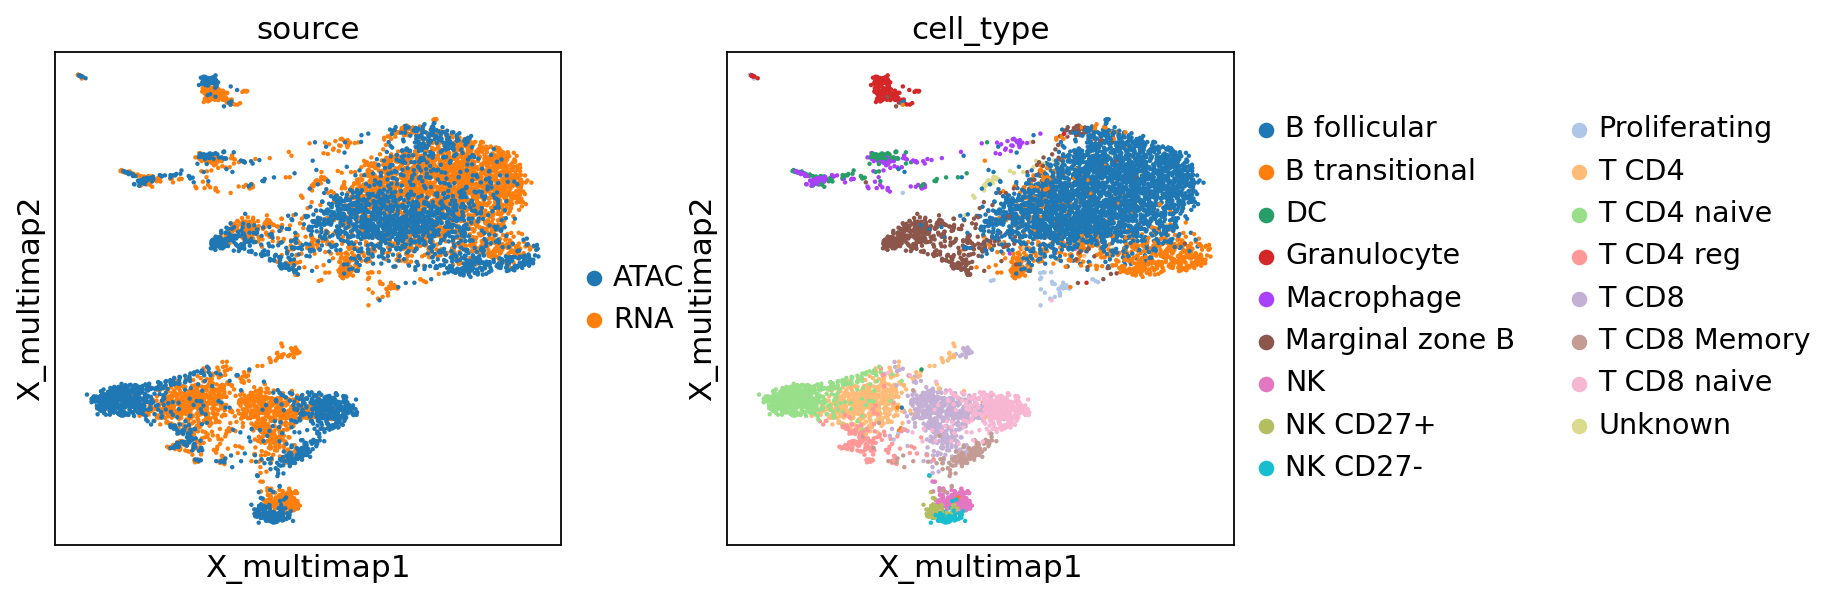

In [9]:
sc.pl.embedding(adata, 'X_multimap', color=['source','cell_type'])

In [75]:
adata.obsm['X_multimap']

AnnData object with n_obs × n_vars = 18052 × 14051
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'barcode', 'nCount_ADT', 'nFeature_ADT'
    uns: 'neighbors'
    obsm: 'X_pca', 'Y_pca', 'X_multimap'
    obsp: 'connectivities'

In [6]:
rna = sc.read("../../joint_bench/data/BMMC_kaggle/CITE/p10/BMMC-CITE_seq-p10-RNA-counts.h5ad")
adt = sc.read("../../joint_bench/data/BMMC_kaggle/CITE/p10/BMMC-CITE_seq-p10-ADT-counts.h5ad")

In [67]:
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

rna_pca = rna.copy()
sc.pp.scale(rna_pca)
sc.pp.pca(rna_pca)
rna.obsm['X_pca'] = rna_pca.obsm['X_pca'].copy()

In [7]:
adt_pca = adt.copy()
muon.prot.pp.clr(adt_pca)

sc.pp.pca(adt_pca,)
adt.obsm['X_pca'] = adt_pca.obsm['X_pca'].copy()

In [8]:
adata = MultiMAP.Integration([rna, adt], ['X_pca', 'X_pca'])

In [ ]:
adata.obsm['X_multimap']

In [9]:
rna = sc.read_h5ad('../../joint_bench/demo_notebook/input/spatial/Mouse_Thymus/adata_RNA.h5ad')
adt = sc.read_h5ad('../../joint_bench/demo_notebook/input/spatial/Mouse_Thymus/adata_ADT.h5ad')

In [10]:
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

rna_pca = rna.copy()
sc.pp.pca(rna_pca,n_comps=20)
rna.obsm['X_pca'] = rna_pca.obsm['X_pca'].copy()

adt_pca = adt.copy()
muon.prot.pp.clr(adt_pca)

sc.pp.pca(adt_pca,n_comps=20) 
adt.obsm['X_pca'] = adt_pca.obsm['X_pca'].copy()

In [142]:
rna.obsm['spatial'].shape

(4697, 2)

In [143]:
rna.obsm['X_pca'].shape

(4697, 20)

In [144]:
adt.obsm['X_pca'].shape

(4697, 20)

In [ ]:
adata1 = MultiMAP.matrix.MultiMAP([rna.obsm['X_pca'],adt.obsm['X_pca']])[2]
adata2 = MultiMAP.matrix.MultiMAP([adata1,rna.obsm['spatial']])[2]

In [139]:
adata[2]

array([[13.11131  ,  3.6484687],
       [12.730986 ,  1.4215325],
       [12.95621  ,  1.7190137],
       ...,
       [17.611599 , 18.960852 ],
       [17.633911 , 18.961657 ],
       [17.441713 , 18.84429  ]], dtype=float32)